# Malaysia Consumer Price <a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Group Name : 3H

### Group Members

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| NG ZI XING | A21EC0213 | Case Study 1  
| MOHAMAD AZRI HADIF BIN MOHAMMAD RIZAL | A21EC0054 | Case Study 2a
| ALIEYA ZAWANIE BINTI A ZAINI | A21EC0156 | Case Study 2b
| IZZAT HAQEEMI BIN HAIRUDIN | A21EC0033 | Case Study 2c

This project is centered around exploring a dataset obtained from the Consumer Prices: PriceCatcher session at https://open.dosm.gov.my/data-catalogue. The dataset consists of three primary tables: an item lookup table, a premise lookup table, and pricing data spanning from January 2022 to October 2023. To begin, the goal is to focus on the dataset specifically from January 2023 to October 2023 for analysis.

The dataset itself encapsulates comprehensive details about food prices in Malaysia. It encompasses columns such as the date range (from January 1, 2023, to September 30, 2023), premise types (representing where items are priced, such as hypermarkets or supermarkets), item categories (defining broader item classifications like poultry or vegetables), specific items (more granular items within categories like pineapple or apple), districts, states (e.g., Johor, Sabah), and the unit of each recorded price (e.g., per kilogram or pack).

The primary aim of this project is to thoroughly investigate and understand the factors influencing item pricing in Malaysia. The methodology involves initially conducting basic exploratory data analysis to gather insights and identify deeper questions that subsequent sections will address. The following stages entail delving into the dataset with an array of statistical tools and visualizations using Python libraries like Pandas, NumPy, Matplotlib, Seaborn, and Scipy.

The analysis aims to extract meaningful insights from the dataset by employing various statistical techniques, enabling the discovery of relationships, trends, and dependencies within the data. This process will include diverse visualization techniques, hypothesis testing, correlation analysis, regression models, and other statistical methodologies to better comprehend the complexities of item pricing in Malaysia.

## Downloading the Dataset

The data is consist of three sperate .csv file which is the price of the item, item look up table, premise look up table. All the data can downloaded via official provided link:
- [item look up table](https://storage.data.gov.my/pricecatcher/lookup_item.parquet)
-[premise look up table](https://storage.data.gov.my/pricecatcher/lookup_premise.parquet)
-[price table](https://storage.data.gov.my/pricecatcher/pricecatcher_2023-09.parquet)

In [2]:
import pandas as pd
import numpy as np

In [3]:
#If you don't want to run the data cleanning section, simpy uncomment here and run then skip data cleaning part and go through the rest
#import it from drive if needed ( normally will take 1 min and half )

#path = "https://drive.google.com/uc?export=download&id=1-6jBhXqAKTa3_2SUxo5lnhLcaMYD4Wkv&confirm=t&uuid=dcb28c07-e560-4b83-9ecb-a62b2b1ad64d&at=AB6BwCAHPXfZ3WDZt5rbSdhOuko3:1699539919972p"
#data = pd.read_csv(path, compression = "zip", index_col = 0)

Let's begin by downloading the data by pd.read_parquet due to all of the link provided with parquet suffix

In [ ]:
item = pd.read_parquet("https://storage.data.gov.my/pricecatcher/lookup_item.parquet")
premise = pd.read_parquet("https://storage.data.gov.my/pricecatcher/lookup_premise.parquet")

price = pd.read_parquet("https://storage.data.gov.my/pricecatcher/pricecatcher_2023-01.parquet")
for i in range(2, 10):
  price = pd.concat( [price, pd.read_parquet(f"https://storage.data.gov.my/pricecatcher/pricecatcher_2023-0{i}.parquet") ], axis = 0  )

The dataset has been downloaded and extracted.

In [ ]:
item.head()

item_code                                               item  unit  \
0         -1                                               None  None   
1          1                             AYAM BERSIH - STANDARD   1kg   
2          2                                AYAM BERSIH - SUPER   1kg   
3          3                                         AYAM HIDUP   1kg   
4          9  DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...   1kg   

       item_group item_category  
0            None          None  
1  BARANGAN SEGAR          AYAM  
2  BARANGAN SEGAR          AYAM  
3  BARANGAN SEGAR          AYAM  
4  BARANGAN SEGAR        DAGING

In [ ]:
premise.head()

premise_code                            premise  \
0          -1.0                               None   
1           2.0                   PASAR BESAR IPOH   
2           3.0                   JUSCO AYER KEROH   
3           6.0  KEDAI RUNCIT TAFAZ MAJU PRESINT 9   
4           7.0   KEDAI RUNCIT SYAZ MAJU PRESINT 9   

                                             address  \
0                                                  ,   
1    JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK   
2  LOT 4991,MUKIM BUKIT BARU,75450 LEBUH AYER KER...   
3        NO.5, JALAN P9B/1,PRESINT 9,62250 PUTRAJAYA   
4        NO.5, JALAN P9E/1,PRESINT 9,62250 PUTRAJAYA   

               premise_type           state       district  
0                      None            None           None  
1              Pasar Basah            Perak          Kinta  
2  Pasar Raya / Supermarket          Melaka  Melaka Tengah  
3              Kedai Runcit  W.P. Putrajaya   Wp Putrajaya  
4              Kedai Runcit  W.P. Putrajaya   Wp Putrajaya

In [ ]:
price.head()

date  premise_code  item_code  price
0  2023-01-01             2          1    9.4
1  2023-01-01             2          9   36.0
2  2023-01-01             2         14   24.0
3  2023-01-01             2         16    4.5
4  2023-01-01             2         18    5.5

## Data Preparation and Cleaning

In this stage, we are going to do the missing value handling, datatype conversion and join the three tables into one dataframe. The reason we have to merge is that we can observe that the premise_code and item_code are the foreign key from the premise table and item table.



In [ ]:
#observe the premise

print(premise.info(), "\n\n")
print(premise.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2706 entries, 0 to 2705
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   premise_code  2705 non-null   float64
 1   premise       2704 non-null   object 
 2   address       2706 non-null   object 
 3   premise_type  2704 non-null   object 
 4   state         2704 non-null   object 
 5   district      2704 non-null   object 
dtypes: float64(1), object(5)
memory usage: 127.0+ KB
None 


premise_code    1
premise         2
address         0
premise_type    2
state           2
district        2
dtype: int64


In [ ]:
#we can observe that the premise_code should in be in integer and there are null value exists lets observe where are them located

premise[ premise["premise"].isna() ]

premise_code premise address premise_type state district
0             -1.0    None       ,         None  None     None
2705           NaN    None      ,,         None  None     None

In [ ]:
#to avoid the null value and -1.0 is the special case for the price table that we should preserve, lets observe are there related premise_cose exist in price table

print(price[  price["premise_code"].isna()  ].shape[0])
print(price[  price["premise_code"] == -1.0 ].shape[0])

#the number of case involved is negilible, so we just drop them directly

0
10


In [ ]:
# we can observe that the two premise_code is not exists in the price table, so lets discard them and change the premise code datatype to integer

premise = premise.drop( [0, 2705], axis = 0)
premise["premise_code"] = premise["premise_code"].astype("int")

In [ ]:
print(premise.info(), "\n\n")
print(premise.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 1 to 2704
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   premise_code  2704 non-null   int64 
 1   premise       2704 non-null   object
 2   address       2704 non-null   object
 3   premise_type  2704 non-null   object
 4   state         2704 non-null   object
 5   district      2704 non-null   object
dtypes: int64(1), object(5)
memory usage: 126.9+ KB
None 


premise_code    0
premise         0
address         0
premise_type    0
state           0
district        0
dtype: int64


In [ ]:
# lets apply the same method to clean the item table

print(item.info(), "\n\n")
item.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   item_code      757 non-null    int64 
 1   item           756 non-null    object
 2   unit           756 non-null    object
 3   item_group     756 non-null    object
 4   item_category  756 non-null    object
dtypes: int64(1), object(4)
memory usage: 29.7+ KB
None 




item_code        0
item             1
unit             1
item_group       1
item_category    1
dtype: int64

In [ ]:
item[ item["item"].isna() ]

item_code  item  unit item_group item_category
0         -1  None  None       None          None

In [ ]:
#observe is that a special case we have to preserve in the price table

price[ price["item_code"] == -1 ].shape[0]

0

In [ ]:
#this is not a special case, so lets discard it

item = item.drop([0], axis = 0)

In [ ]:
print(item.info(), "\n\n")
item.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   item_code      756 non-null    int64 
 1   item           756 non-null    object
 2   unit           756 non-null    object
 3   item_group     756 non-null    object
 4   item_category  756 non-null    object
dtypes: int64(1), object(4)
memory usage: 29.7+ KB
None 




item_code        0
item             0
unit             0
item_group       0
item_category    0
dtype: int64

In [ ]:
#observe whether the unit is appropriate to convert to number

item["unit"].unique()
# seem like the original is better choice

array(['1kg', '1 biji', '10 biji', '15 Biji', '100 g', '840 ml',
       '100 beg', '155 g', '425 g', '150 g', '400 g', '480 g', '250 g',
       '330 ml', '345ml', '650 ml', '325 g', '340 g', '250 ml', '1 liter',
       '1.5 liter', '325 ml', '150 ml', '5 kg', '160 g', '650g', '600 g',
       '390g', '550 g', '8 g', '10 g', '500 g', '10 kg', '2 liter',
       '200 g', '25 g', '3 ml', '79 g', '43 g', '226g', '3 kg', '2 kg',
       '30 biji', '510 g', '340ml', '360g', '330 g', '240 g', '40 g',
       'sepinggan', 'sebungkus', 'semangkuk', 'seketul', 'sepiring',
       'sebiji', '1 set', 'sekeping', 'gelas kecil', 'gelas besar',
       'segelas', '±100kg/seekor', '60ml', '+-450g', '200 ml', '320 ml',
       '120 g', '110 g', 'M74', '1 batang', '350 g', '900ml', '1000 ml',
       '2 X 10G', '17 g', '26G', '125 g', '220 g', '+- 500g', '+-350g',
       '500 ml', '25 ml', '227g', '11g', '225g', '450 g', '30x33g',
       '180 g', '7ml', '20ml', 'senaskah', '1 unit', 'paket', '70ml',
       '75 

In [ ]:
#observe the price table

print(price.info(),"\n\n")
print(price.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21798292 entries, 0 to 2381139
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   premise_code  int64  
 2   item_code     int64  
 3   price         float64
dtypes: float64(1), int64(2), object(1)
memory usage: 831.5+ MB
None 


date            0
premise_code    0
item_code       0
price           0
dtype: int64


In [ ]:
#all thing is good in price table, lets merge this three table

data = pd.merge( pd.merge( price, item, on = "item_code" ), premise, on ="premise_code" )

In [ ]:
data.head()

date  premise_code  item_code  price                    item unit  \
0  2023-01-01             2          1    9.4  AYAM BERSIH - STANDARD  1kg   
1  2023-01-03             2          1    9.4  AYAM BERSIH - STANDARD  1kg   
2  2023-01-04             2          1    9.4  AYAM BERSIH - STANDARD  1kg   
3  2023-01-05             2          1    9.4  AYAM BERSIH - STANDARD  1kg   
4  2023-01-06             2          1    9.4  AYAM BERSIH - STANDARD  1kg   

       item_group item_category           premise  \
0  BARANGAN SEGAR          AYAM  PASAR BESAR IPOH   
1  BARANGAN SEGAR          AYAM  PASAR BESAR IPOH   
2  BARANGAN SEGAR          AYAM  PASAR BESAR IPOH   
3  BARANGAN SEGAR          AYAM  PASAR BESAR IPOH   
4  BARANGAN SEGAR          AYAM  PASAR BESAR IPOH   

                                           address  premise_type  state  \
0  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
1  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
2  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
3  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
4  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   

  district  
0    Kinta  
1    Kinta  
2    Kinta  
3    Kinta  
4    Kinta

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21798112 entries, 0 to 21798111
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   premise_code   int64  
 2   item_code      int64  
 3   price          float64
 4   item           object 
 5   unit           object 
 6   item_group     object 
 7   item_category  object 
 8   premise        object 
 9   address        object 
 10  premise_type   object 
 11  state          object 
 12  district       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.3+ GB


In [ ]:
#premise_code and item_code column is not longer needed

data = data.drop( ["premise_code", "item_code"], axis = 1 )

In [ ]:
data.head()

date  price                    item unit      item_group  \
0  2023-01-01    9.4  AYAM BERSIH - STANDARD  1kg  BARANGAN SEGAR   
1  2023-01-03    9.4  AYAM BERSIH - STANDARD  1kg  BARANGAN SEGAR   
2  2023-01-04    9.4  AYAM BERSIH - STANDARD  1kg  BARANGAN SEGAR   
3  2023-01-05    9.4  AYAM BERSIH - STANDARD  1kg  BARANGAN SEGAR   
4  2023-01-06    9.4  AYAM BERSIH - STANDARD  1kg  BARANGAN SEGAR   

  item_category           premise  \
0          AYAM  PASAR BESAR IPOH   
1          AYAM  PASAR BESAR IPOH   
2          AYAM  PASAR BESAR IPOH   
3          AYAM  PASAR BESAR IPOH   
4          AYAM  PASAR BESAR IPOH   

                                           address  premise_type  state  \
0  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
1  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
2  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
3  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
4  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   

  district  
0    Kinta  
1    Kinta  
2    Kinta  
3    Kinta  
4    Kinta

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21798112 entries, 0 to 21798111
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   price          float64
 2   item           object 
 3   unit           object 
 4   item_group     object 
 5   item_category  object 
 6   premise        object 
 7   address        object 
 8   premise_type   object 
 9   state          object 
 10  district       object 
dtypes: float64(1), object(10)
memory usage: 1.9+ GB


In [ ]:
#zip and save it
data.to_csv("data.zip", compression = {"method" : "zip"})

In [ ]:
#move to google drive

from google.colab import drive
drive.mount("/content/drive")

!cp data.zip /content/drive/MyDrive/HPDP_Assignment

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#delete all not longer needed table

del price, item, premise

## Exploratory Analysis and Visualization


### Basic Exploration of Distributions

The aim of this section is to unveil the composition or distribution of values within each column through graphical representations.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
data.head()

Unnamed: 0        date  price                    item unit      item_group  \
0           0  2023-01-01    9.4  AYAM BERSIH - STANDARD  1kg  BARANGAN SEGAR   
1           1  2023-01-03    9.4  AYAM BERSIH - STANDARD  1kg  BARANGAN SEGAR   
2           2  2023-01-04    9.4  AYAM BERSIH - STANDARD  1kg  BARANGAN SEGAR   
3           3  2023-01-05    9.4  AYAM BERSIH - STANDARD  1kg  BARANGAN SEGAR   
4           4  2023-01-06    9.4  AYAM BERSIH - STANDARD  1kg  BARANGAN SEGAR   

  item_category           premise  \
0          AYAM  PASAR BESAR IPOH   
1          AYAM  PASAR BESAR IPOH   
2          AYAM  PASAR BESAR IPOH   
3          AYAM  PASAR BESAR IPOH   
4          AYAM  PASAR BESAR IPOH   

                                           address  premise_type  state  \
0  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
1  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
2  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
3  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   
4  JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK  Pasar Basah   Perak   

  district  
0    Kinta  
1    Kinta  
2    Kinta  
3    Kinta  
4    Kinta

#### Exploration of the Price Column

The graph reveals a pattern resembling multiple normal distributions stacked together. This suggests that the price distribution can be deconstructed into multiple primary components, each with varying weights. This phenomenon aligns with a Gaussian mixture distribution, indicating a complex blend of multiple normal distributions within the price data.


<Axes: xlabel='price', ylabel='Frequency'>

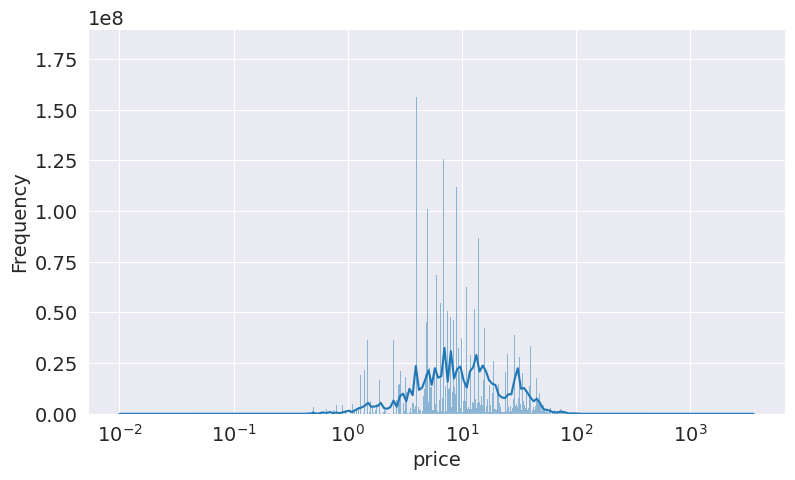

In [ ]:
sns.histplot(data = data["price"], log_scale = True, kde = True, stat = "frequency")

#### Exploration of the Item Category Column

The observation from the graph indicates a consistent occurrence of at least 10 to the power of 4 instances across the dataset. This volume of data suggests a robust basis for drawing reliable conclusions. However, it's noteworthy that the distribution within this column is not uniform across the 38 different item categories.


In [ ]:
def hist_plot(column):

  ax = sns.histplot( data = data[column] )
  ax.set_xticklabels( [  s.get_text()[:15] + "..." if len(s.get_text())>15 else s for s in ax.get_xticklabels() ] , rotation = 90, fontsize = 10)

  return ax

<ipython-input-32-281adabe3a5b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [  s.get_text()[:15] + "..." if len(s.get_text())>15 else s for s in ax.get_xticklabels() ] , rotation = 90, fontsize = 10)


<Axes: xlabel='item_category', ylabel='Count'>

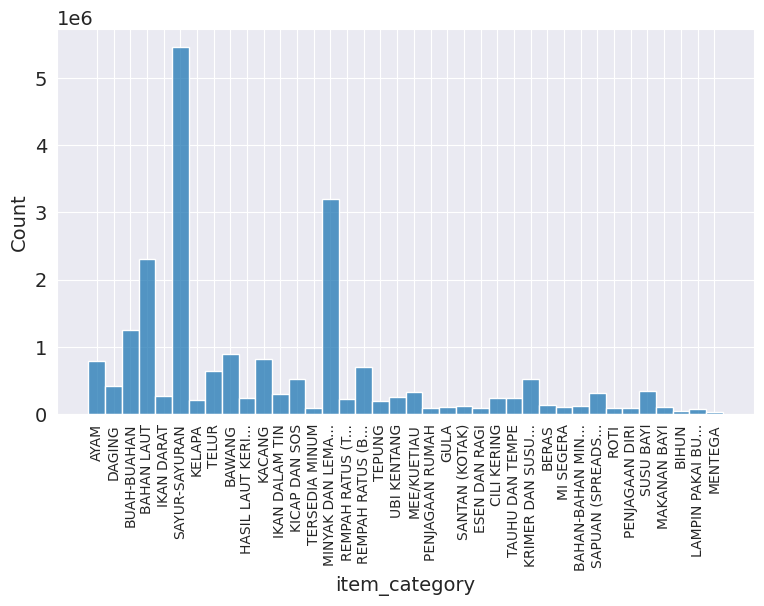

In [ ]:
hist_plot("item_category")

#### Exploration of the State Column

Similar to the premise type column, the distribution across the states is not uniform. This non-uniformity impacts the confidence of the conclusions for each state. Nevertheless, the dataset contains a significant volume of data, each state with a level of at least 10 to the power of 5.


<ipython-input-32-281adabe3a5b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [  s.get_text()[:15] + "..." if len(s.get_text())>15 else s for s in ax.get_xticklabels() ] , rotation = 90, fontsize = 10)


<Axes: xlabel='state', ylabel='Count'>

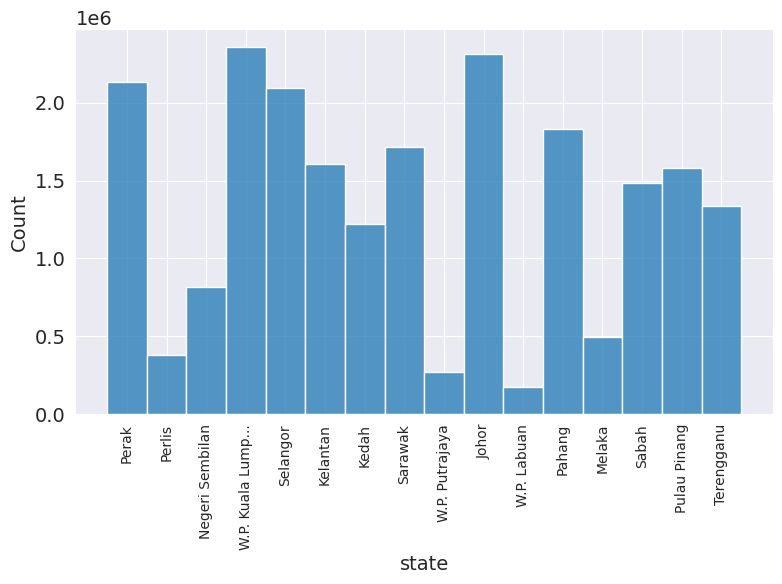

In [ ]:
hist_plot("state")

#### Exploration of Premise Type Column

This dataset comprises six distinct premise types. However, it's notable that the dataset contains limited data on "borong" compared to the other types.


<ipython-input-32-281adabe3a5b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [  s.get_text()[:15] + "..." if len(s.get_text())>15 else s for s in ax.get_xticklabels() ] , rotation = 90, fontsize = 10)


<Axes: xlabel='premise_type', ylabel='Count'>

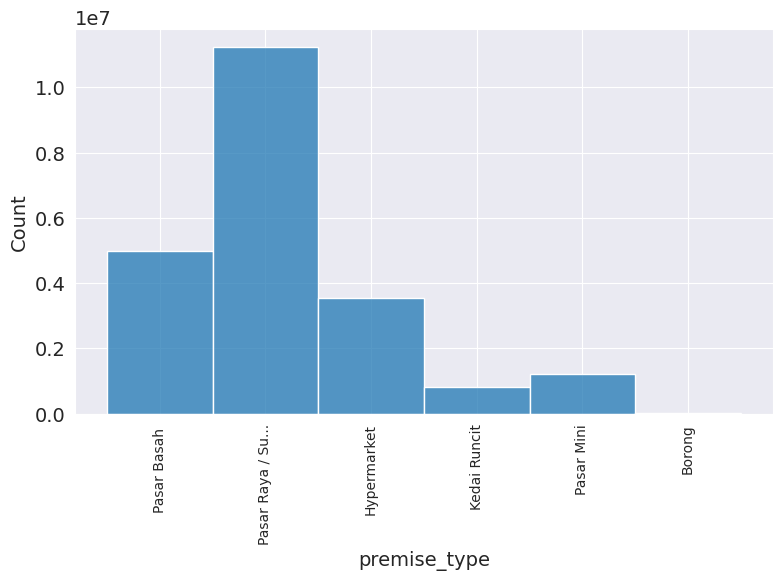

In [ ]:
hist_plot("premise_type")

### Explore the Price Distribution in Conditional Context

Following initial exploration of pertinent columns for our analysis, it's imperative to delve deeper into investigating the item prices. Merely plotting the price trend according to date lacks meaningful insights. Instead, it's valuable to chart the price based on various conditions such as premise type, item category, and state. This approach allows us to gain insight into how these factors affect the price distribution.


#### Distribution of price by each item category

This section illustrates the price distribution for each item category. Grouping the prices according to the date and item category, the mean is employed as the aggregating method. Each item category type is represented as a column, providing a chart for visualizing the price distribution. The reason for not using pivot directly is due to memory constraints, as direct pivoting is excessively memory-intensive and could result in system crashes.


In [ ]:
date_itemCat_price = data[["date", "item_category", "price"]].groupby( ["date", "item_category"], as_index = False).mean().pivot( index = "date", columns = "item_category", values = "price")
date_itemCat_price_stat = date_itemCat_price.describe().T
date_itemCat_price_stat.head()

count       mean       std        min        25%  \
item_category                                                           
AYAM                 252.0  13.935854  0.196055  13.471466  13.829308   
BAHAN LAUT           252.0  25.831020  0.712212  17.687500  25.637152   
BAHAN-BAHAN MINUMAN   40.0  13.291445  2.054371   4.500000  12.913512   
BAWANG               252.0   6.573395  0.422981   5.472088   6.417855   
BERAS                157.0  18.063414  7.466567   5.550000  12.580000   

                           50%        75%        max  
item_category                                         
AYAM                 13.976466  14.047887  15.575000  
BAHAN LAUT           25.886818  26.185683  27.039845  
BAHAN-BAHAN MINUMAN  13.351144  14.178355  18.200000  
BAWANG                6.620632   6.760691   9.857143  
BERAS                21.182581  22.781483  32.250000

In [ ]:
date_itemCat_price.head()

item_category       AYAM  BAHAN LAUT  BAHAN-BAHAN MINUMAN    BAWANG  \
date                                                                  
2023-01-01     13.809771   25.466421             12.94663  6.450552   
2023-01-02     13.574937   23.417855                  NaN  5.665421   
2023-01-03     13.997509   25.509079                  NaN  6.511100   
2023-01-04     13.974329   25.609050                  NaN  6.542458   
2023-01-05     14.044070   25.697981                  NaN  6.546678   

item_category      BERAS     BIHUN  BUAH-BUAHAN  CILI KERING     DAGING  \
date                                                                      
2023-01-01     22.601589  3.337202     6.432652    27.663734  32.235990   
2023-01-02     25.816000  3.295000     6.506726    27.339649  28.283495   
2023-01-03           NaN       NaN     6.377850    28.246688  32.159910   
2023-01-04      5.666667       NaN     6.396919    28.315016  32.116557   
2023-01-05           NaN       NaN     6.441268    28.374161  32.273715   

item_category  ESEN DAN RAGI  ...      ROTI  SANTAN (KOTAK)  SAPUAN (SPREADS)  \
date                          ...                                               
2023-01-01          2.837509  ...  3.476697        6.664461          9.338899   
2023-01-02          2.425000  ...  3.400000        6.000000          8.906429   
2023-01-03               NaN  ...       NaN             NaN               NaN   
2023-01-04               NaN  ...       NaN             NaN               NaN   
2023-01-05               NaN  ...       NaN             NaN               NaN   

item_category  SAYUR-SAYURAN  SUSU BAYI  TAUHU DAN TEMPE     TELUR    TEPUNG  \
date                                                                           
2023-01-01          9.844127  40.362532         1.035144  6.421910  3.243287   
2023-01-02          9.612122  38.991429         1.022103  5.812338  3.813333   
2023-01-03          9.754511        NaN         1.031872  6.421384       NaN   
2023-01-04          9.750332        NaN         1.032442  6.436317       NaN   
2023-01-05          9.756508        NaN         1.033739  6.591044       NaN   

item_category  TERSEDIA MINUM  UBI KENTANG  
date                                        
2023-01-01           3.812162     4.462680  
2023-01-02                NaN     4.319160  
2023-01-03                NaN     4.615340  
2023-01-04                NaN     4.613106  
2023-01-05                NaN     4.676083  

[5 rows x 38 columns]

In [ ]:
# standarlize the aggregated data is needed for better visualization
show_data = (date_itemCat_price - date_itemCat_price_stat["mean"] ) / date_itemCat_price_stat["std"]

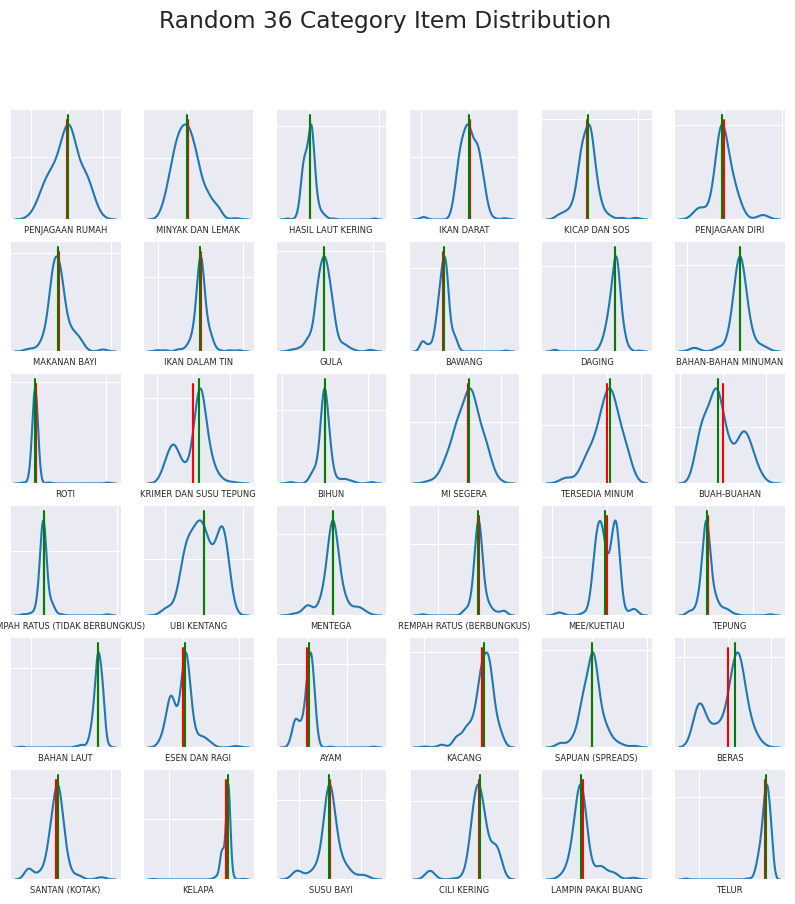

In [ ]:
#draw the price distribution for each item category
fig, ax = plt.subplots(6,6, figsize = (10,10))
ax = ax.flatten()

fig.suptitle("Random 36 Category Item Distribution")
for i, j in enumerate( np.random.choice( 38, 36, replace = False) ):

  median = (date_itemCat_price_stat["50%"].iloc[j] - date_itemCat_price_stat["mean"].iloc[j] ) / date_itemCat_price_stat["std"].iloc[j]

  sns.kdeplot(data = show_data.iloc[:, j] , legend = False, ax = ax[i])
  ax[i].plot([0,0], [0, ax[i].get_ylim()[1]], color = "red")
  ax[i].plot([ median , median], [0, ax[i].get_ylim()[1]], color = "green")
  ax[i].xaxis.set_tick_params(labelbottom = False)
  ax[i].yaxis.set_tick_params(labelleft=False)
  ax[i].set_ylabel(None)
  ax[i].set_xlabel( ax[i].get_xlabel(), fontsize = 6 )

For the graph above, the blue curve line represents the distribution of the price, the red line signifies the mean, and the green line stands for the median.

Observing the data, it's noticeable that most of it concentrates around the center point, evident from the convergence of the median and mean lines, resembling a near-normal distribution but with smaller variance. This aligns with our hypothesis while plotting the price column's distribution, hinting at a Gaussian mixture distribution. However, the results aren't surprising, as our method of aggregation is the mean, adhering to the central limit theorem, ensuring a normal distribution for the mean.

In cases with two or more peaks, this might signify a more complex distribution that can be further decomposed into other components, each possibly following a normal distribution. Alternatively, this could be due to the need for more data or an abundance of null values in that column.


#### Trend of Price for Three Main Item Categories

The essential dietary needs for humans encompass Carbonhydrate, Fiber, and Protein. Hence, highlighting the price trends for each of these becomes imperative. As the original data trends are highly fluctuating, a ten-day moving average is utilized to plot the trends.


In [ ]:
#min max scaling the price into 0 - 1 range for better visualization

show_data = date_itemCat_price.interpolate(method = "linear", limit_direction = "forward", axis = 0)
show_data = (show_data - date_itemCat_price_stat["min"] ) / ( date_itemCat_price_stat["max"] - date_itemCat_price_stat["min"] )

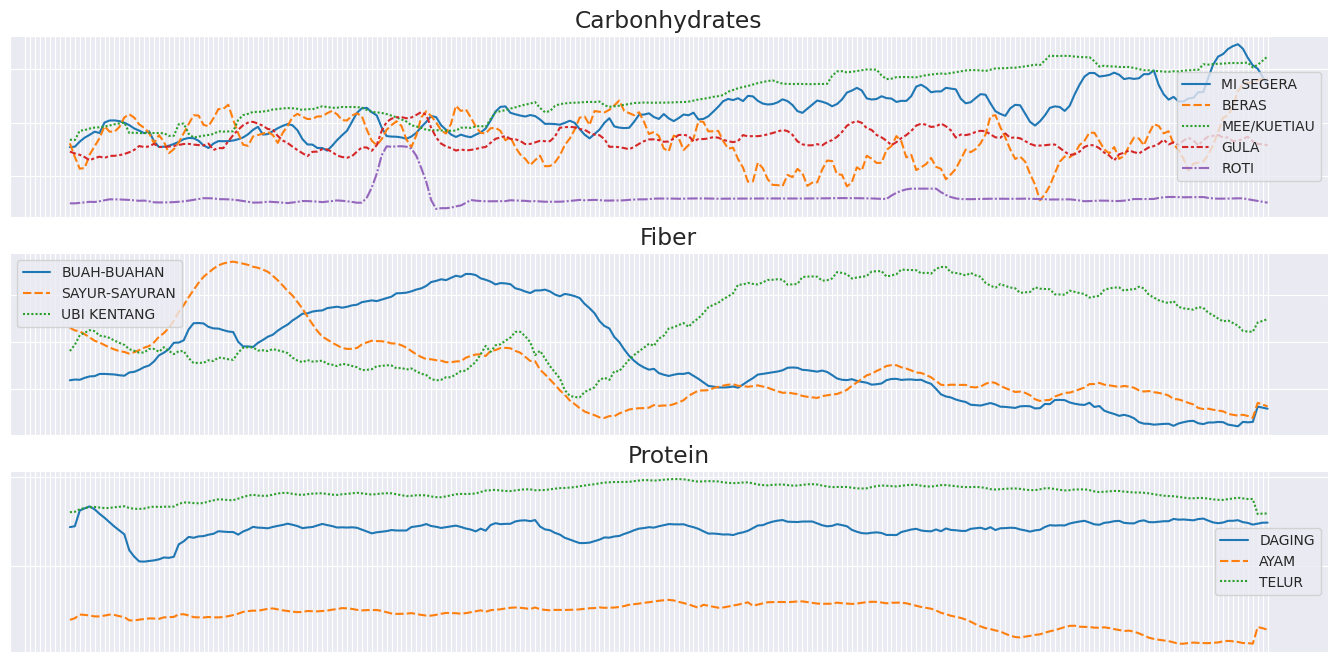

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (17,8))
ax = ax.flatten()

group = { "Carbonhydrates" : ["MI SEGERA", "BERAS", "MEE/KUETIAU", "GULA", "ROTI"], "Fiber" : ["BUAH-BUAHAN", "SAYUR-SAYURAN", "UBI KENTANG"], "Protein" : ["DAGING", "AYAM","TELUR"] }

for g,a in zip(group, ax):

  sns.lineplot(show_data[group[g]].rolling(10).mean(), ax = a)
  a.xaxis.set_tick_params(labelbottom = False)
  a.yaxis.set_tick_params(labelleft=False)
  a.set_xlabel(None, fontsize = 14)
  a.set_title(g)
  a.legend( fontsize = 10)

The observations derived from the graph offer several crucial insights into the dataset. Firstly, a notable stability characterizes the price of roti, with a distinct, abrupt price increase observed within a specific timeframe. Interestingly, this price trend in roti is reminiscent of the price behavior in gula, displaying a similar shape in its curve and maintaining a relatively stable price except during the mentioned time interval. This similarity prompts the investigation into the potential high correlation between gula and roti.

Within the carbonhydrate category, a substantial number of items exhibit significant price fluctuations, despite a general increasing trend. Particularly, there's a distinct and abrupt increase in the price of beras during August to September 2023.

The Fiber category, in contrast, demonstrates a smoother variation in prices compared to the erratic nature observed in the carbonhydrate category. However, there's an interesting observation indicating an opposing trend between Buah-buahan and ubi kentang. Moreover, the trends in Buah-Buahan and Sayur-Sayuran items appear quite similar, leading to inquiries about a potential positive correlation between these categories.

Conversely, the trend lines for items in the protein category remain consistently stable. However, an intriguing observation surfaces towards the end of the trend lines, indicating a contrasting price trend between telur and ayam.


In [ ]:
del date_itemCat_price, show_data

#### The price distribution across different state

The expectation is that prices differ across states, but the extent and specific variations remain the inquiry.


In [ ]:
date_state_price = data[["date", "state", "price"]].groupby(["date", "state"], as_index = False).median().pivot(index = "date", columns = "state", values = "price")

date_state_price.head()

state       Johor  Kedah  Kelantan  Melaka  Negeri Sembilan  Pahang  Perak  \
date                                                                         
2023-01-01   7.50    7.4       7.0    7.33             7.50    7.50   7.60   
2023-01-02  10.90   10.0      10.0     NaN              NaN    7.49    NaN   
2023-01-03  10.99   10.0      10.0   10.00            10.90   10.88  10.00   
2023-01-04  10.90   10.0      10.0   10.00            10.90   10.99  10.00   
2023-01-05  10.88   10.0      10.0   10.99            10.99   10.99  10.29   

state       Perlis  Pulau Pinang  Sabah  Sarawak  Selangor  Terengganu  \
date                                                                     
2023-01-01     6.9           7.5    8.0     8.50      7.99        7.39   
2023-01-02    10.0           NaN    NaN    12.00      5.99       10.10   
2023-01-03    10.0          10.0   10.0    11.05     11.50       10.00   
2023-01-04    10.0          10.0   10.0    11.00     11.90       10.90   
2023-01-05    10.0          10.0   10.0    11.00     11.90       10.55   

state       W.P. Kuala Lumpur  W.P. Labuan  W.P. Putrajaya  
date                                                        
2023-01-01               8.00         8.45            7.50  
2023-01-02                NaN          NaN             NaN  
2023-01-03              12.50        10.00           12.00  
2023-01-04              12.70        10.00           12.00  
2023-01-05              12.85        10.00           12.99

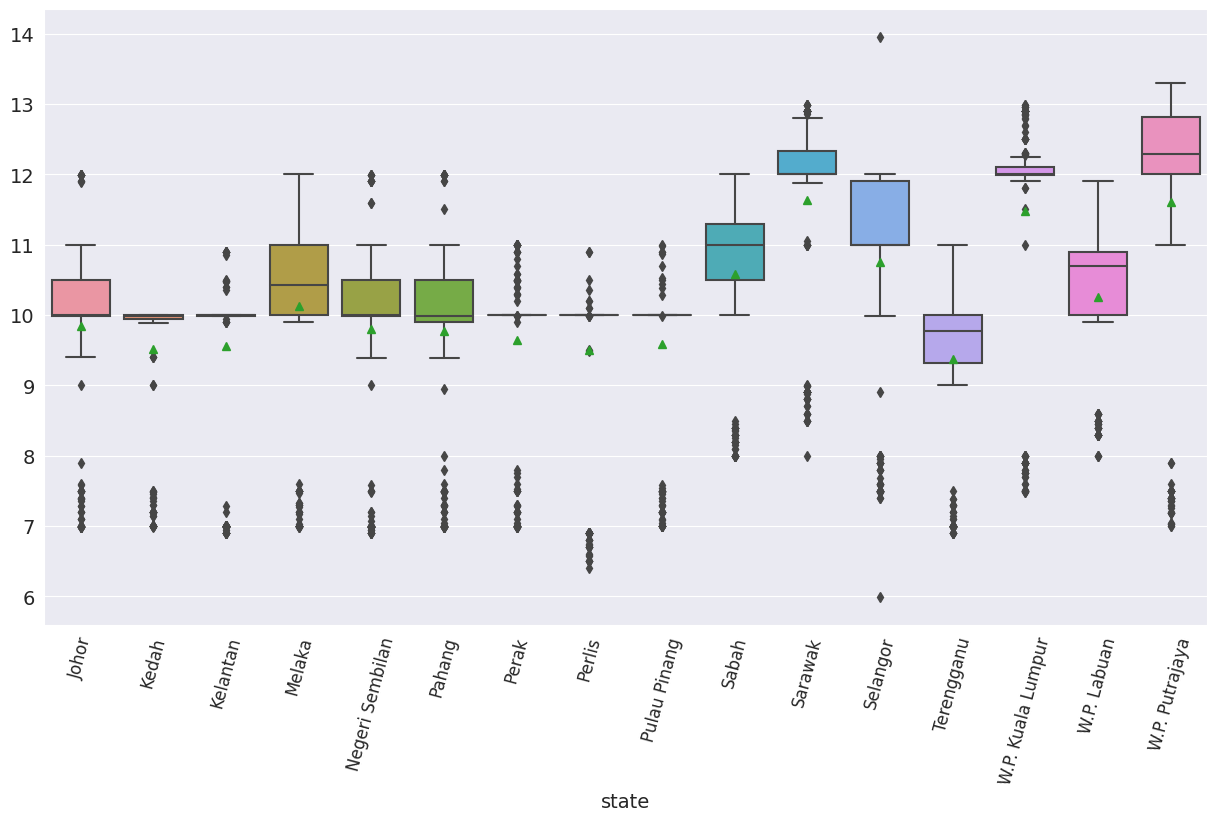

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.boxplot( data = date_state_price, ax = ax,  showmeans = True )
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)

From the graph, it's evident that all states showcase a negative skewed distribution where the median consistently surpasses the means. However, the extent of price variation differs significantly among different states, as indicated by the box plot lengths.

States like Perak, Perlis, and Pulau Pinang exhibit minimal price variation, while Melaka demonstrates the greatest variance in price. This raises questions about whether the diverse regions within Melaka contribute to these pronounced price distribution variations. Additionally, it's notable that Putrajaya and Sarawak reflect the highest prices.


In [ ]:
del date_state_price

### Distribution of Specific Item Category Price for Each Premise Type

Premise types, such as pasar mini, borong, or supermarkets, represent the locations where customers purchase items. Employing the pair plot method enables the display of price distributions across different premise types and examines how item categories impact each other's prices across these varying premise types.


In [ ]:
date_itemCat_price_premTy = data[["date", "item_category", "price", "premise_type"]].groupby( ["date", "item_category", "premise_type"], as_index = False).mean().pivot( index = ["date","premise_type"], columns = "item_category", values = ["price"] ).droplevel(0, axis = 1)
date_itemCat_price_premTy["premise_type"] = list(zip(* date_itemCat_price_premTy.index ))[1] #add the premise type column

date_itemCat_price_premTy.head()

item_category                             AYAM  BAHAN LAUT  \
date       premise_type                                      
2023-01-01 Hypermarket               14.419195   26.496397   
           Kedai Runcit              12.297155   22.027055   
           Pasar Basah               13.216420   24.626495   
           Pasar Mini                13.213867   23.704446   
           Pasar Raya / Supermarket  14.020551   26.369416   

item_category                        BAHAN-BAHAN MINUMAN    BAWANG      BERAS  \
date       premise_type                                                         
2023-01-01 Hypermarket                         12.564523  5.060927  24.460216   
           Kedai Runcit                        13.565788  6.529967  19.648638   
           Pasar Basah                         14.039100  7.696000  12.095455   
           Pasar Mini                          12.896147  6.688411  21.121792   
           Pasar Raya / Supermarket            12.777344  5.895714  23.467309   

item_category                           BIHUN  BUAH-BUAHAN  CILI KERING  \
date       premise_type                                                   
2023-01-01 Hypermarket               3.366294     5.878406    27.852158   
           Kedai Runcit              3.631111     7.153865    25.674336   
           Pasar Basah               3.432143     6.483511    29.054212   
           Pasar Mini                3.241987     7.193535    27.310360   
           Pasar Raya / Supermarket  3.289492     6.482484    27.412552   

item_category                           DAGING  ESEN DAN RAGI  ...  \
date       premise_type                                        ...   
2023-01-01 Hypermarket               33.056996       3.252500  ...   
           Kedai Runcit              31.470000       2.609284  ...   
           Pasar Basah               34.142773       1.957955  ...   
           Pasar Mini                26.830161       2.734181  ...   
           Pasar Raya / Supermarket  29.762764       3.133330  ...   

item_category                        SANTAN (KOTAK)  SAPUAN (SPREADS)  \
date       premise_type                                                 
2023-01-01 Hypermarket                     6.420377          9.586404   
           Kedai Runcit                    6.762083          8.840336   
           Pasar Basah                     6.347575          8.452091   
           Pasar Mini                      7.069040          9.220962   
           Pasar Raya / Supermarket        6.600450          9.473449   

item_category                        SAYUR-SAYURAN  SUSU BAYI  \
date       premise_type                                         
2023-01-01 Hypermarket                    9.593438  45.516885   
           Kedai Runcit                  10.042876  33.477055   
           Pasar Basah                    9.910660  29.266667   
           Pasar Mini                    10.535509  35.922871   
           Pasar Raya / Supermarket       9.681316  41.534103   

item_category                        TAUHU DAN TEMPE     TELUR    TEPUNG  \
date       premise_type                                                    
2023-01-01 Hypermarket                      0.999583  6.814892  3.334212   
           Kedai Runcit                     1.027778  6.427203  3.240484   
           Pasar Basah                      0.995291  6.034401  3.014785   
           Pasar Mini                       1.023030  5.914590  3.253684   
           Pasar Raya / Supermarket         1.099558  6.715257  3.291963   

item_category                        TERSEDIA MINUM  UBI KENTANG  \
date       premise_type                                            
2023-01-01 Hypermarket                     4.226573     5.003619   
           Kedai Runcit                    3.024575     3.955669   
           Pasar Basah                     2.366346     4.206667   
           Pasar Mini                      3.341272     3.978261   
           Pasar Raya / Supermarket        4.068294     4.643085   

it

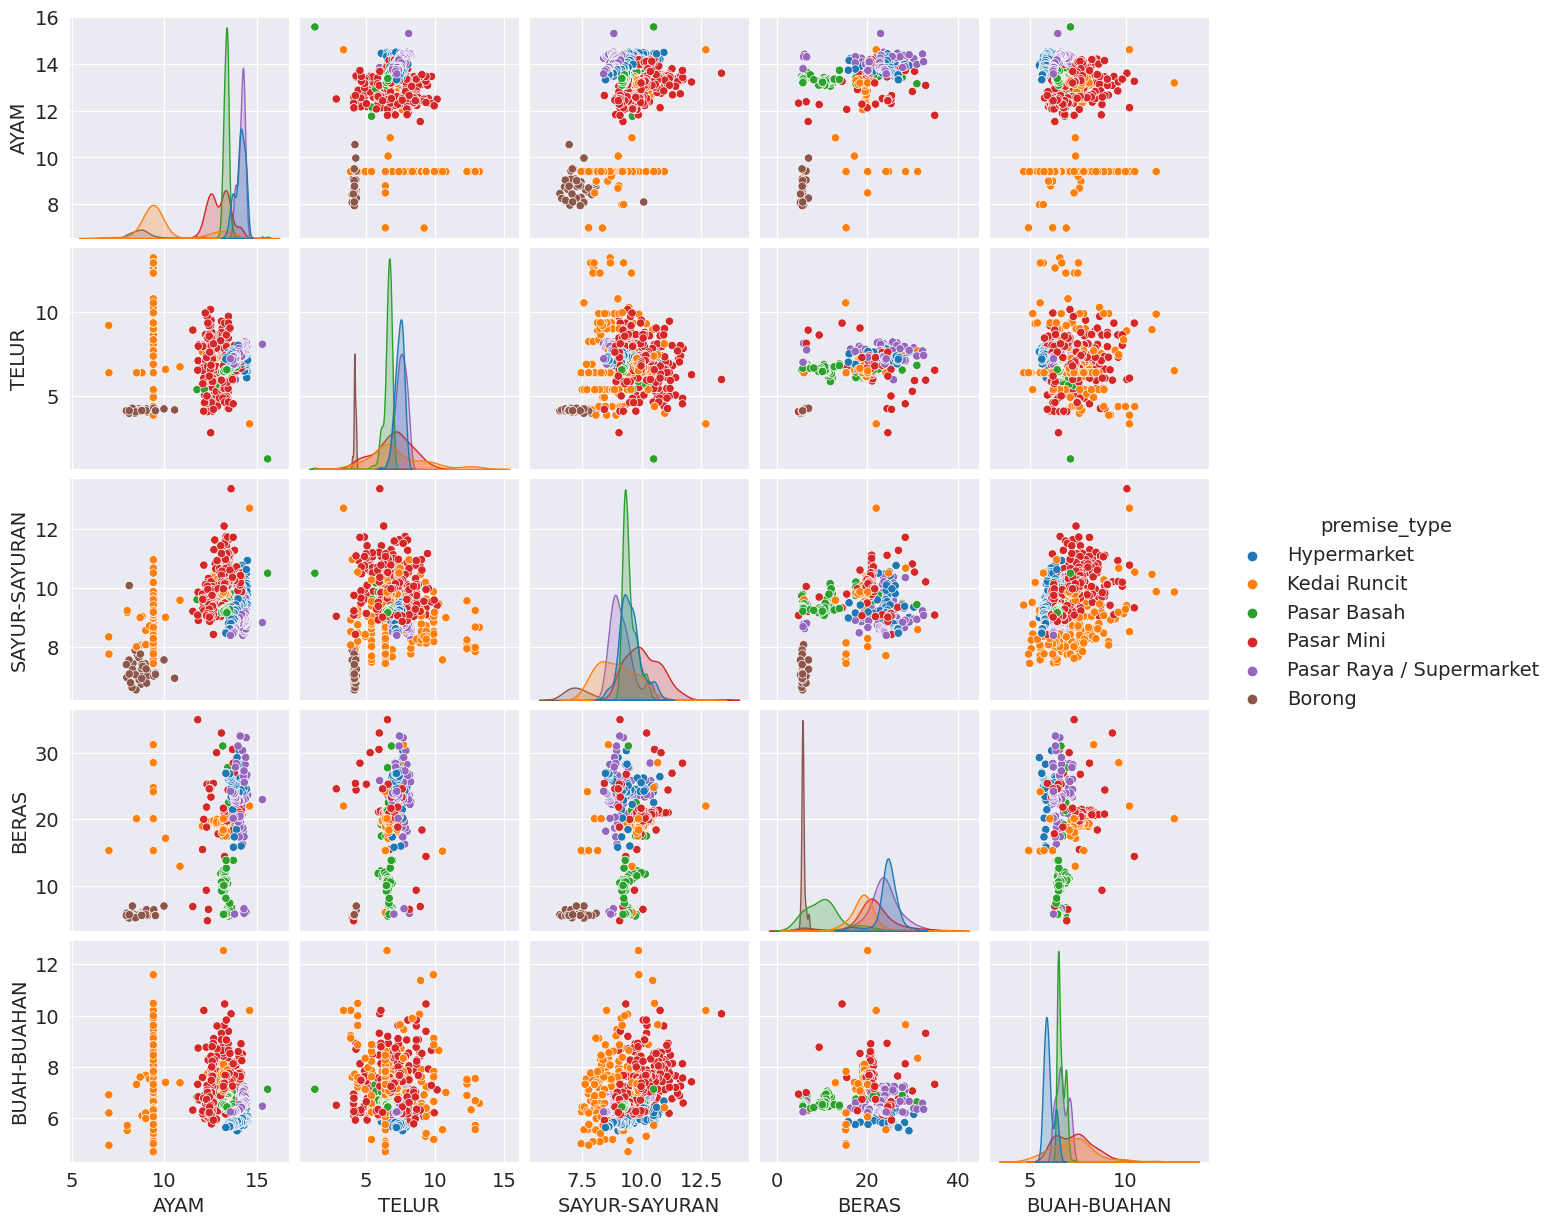

In [ ]:
sns.pairplot( data = date_itemCat_price_premTy[ ["AYAM", "TELUR","SAYUR-SAYURAN", "BERAS", "BUAH-BUAHAN","premise_type"] ], hue = "premise_type" )

The diagonal chart illustrates the price distribution for a specific item across various premise types with distinct colors. In most item categories, borong offers the lowest prices, except in buah-buahan. Conversely, pasar besar tends to exhibit the lowest variance across most categories, except in beras. Essentially, if seeking the lowest prices, borong is preferable, while pasar besar is a better option for more stable pricing trends.

Examining the non-diagonal chart, we observe the interaction of different item categories across various premise types. Unfortunately, deterministic or meaningful relationships between these item categories are not evident. The conclusion drawn is that even across different premise types, items have varied ways of affecting or correlating with each other.


In [ ]:
del date_itemCat_price_premTy

## Asking and Answering Questions




#### Q1: Analyzing the General Price Trend for All Items Over Time

**Solution:** Generating a heatmap with item categories on the x-axis and dates on the y-axis, observing the color trends to determine if prices uniformly increase over time.

**Answer:** The data fails to support the notion that all item prices uniformly increase over time. While there is noticeable fluctuation, the majority of colors representing different items do not consistently rise or fall concerning dates; instead, they exhibit severe fluctuation with intersecting lines of various colors.


In [ ]:
#grauping the data by date and item category and make item catgory as pivot
date_itemCat_price = data[["date", "item_category", "price"]].groupby( ["date", "item_category"], as_index = False).mean().pivot( index = "date", columns = "item_category", values = "price")

#interplote the missing data
date_itemCat_price.interpolate( method = "linear", limit_direction = "forward", axis = 0, inplace = True )

#min max scaling
show_data = (date_itemCat_price - date_itemCat_price_stat["min"] ) / ( date_itemCat_price_stat["max"] - date_itemCat_price_stat["min"] )

<Axes: xlabel='item_category', ylabel='date'>

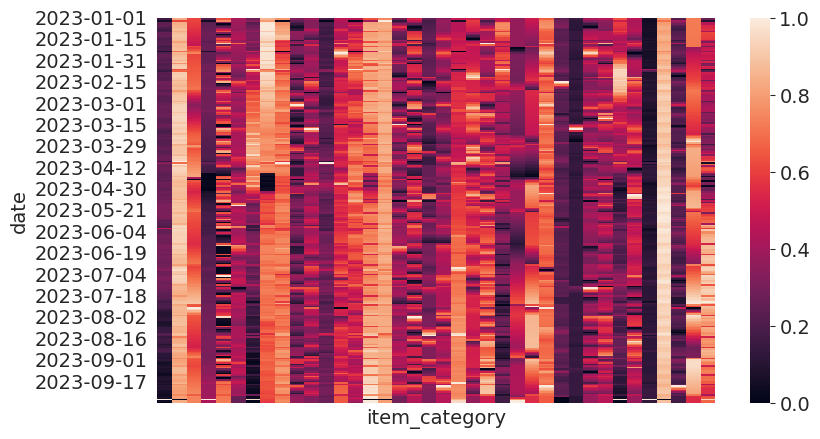

In [ ]:
sns.heatmap( show_data, xticklabels = False)

#### Q2: Examining the Relationship Between the Prices of "Gula" and "Roti"

**Solution:** Drawing a regression line with "Gula" on the y-axis and "Roti" on the x-axis to calculate the correlation between them.

**Answer:** Despite a positive correlation, the score is notably low. The graph displays that these two items are largely independent of each other most of the time.


Correlation: 0.3371861529538735


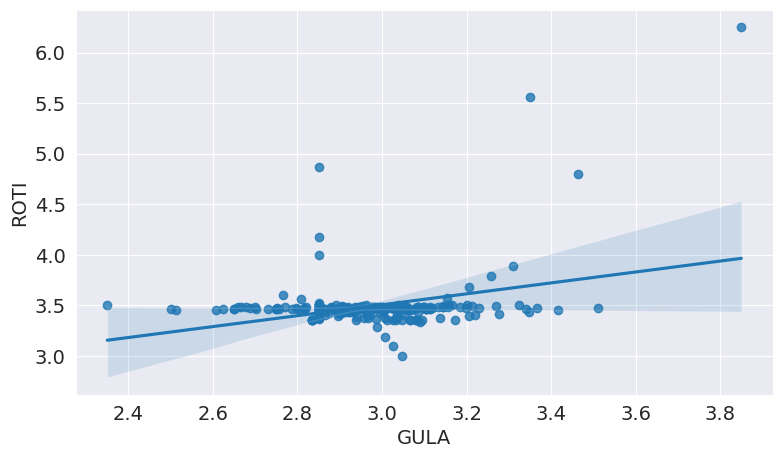

In [ ]:
sns.regplot( data = date_itemCat_price[["GULA", "ROTI"]], x ="GULA", y = "ROTI" )

#calculate correlation
corr = date_itemCat_price["GULA"].corr(date_itemCat_price["ROTI"])
print(f"Correlation: { corr }")

#### Q3: Analyzing Relationships Among "Sayur-Sayuran," "Buah-Buahan," and "Ubi Kentang"

**Solution:** Drawing regression lines for each combination of these three categories to calculate the correlation coefficient.

**Answer:** Each combination demonstrates a visible trend, indicating a certain degree of correlation among all three. Through correlation analysis, it's evident that "Buah-Buahan" and "Ubi Kentang" exhibit the highest correlation with a negative slope. This implies a significant correlation between the three categories to a certain extent.


Correlation between SAYUR-SAYURAN and BUAH-BUAHAN : 0.4823866708879319
Correlation between SAYUR-SAYURAN and UBI KENTANG : -0.36942117273819036
Correlation between BUAH-BUAHAN and UBI KENTANG : -0.6821702819378903


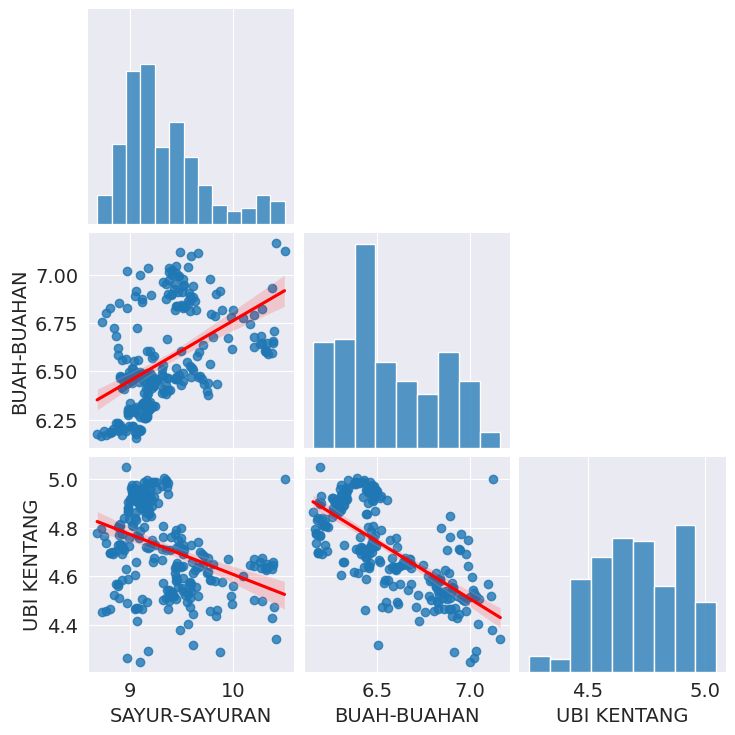

In [ ]:
#plot the pairplot graph
columns = ["SAYUR-SAYURAN", "BUAH-BUAHAN", "UBI KENTANG"]
sns.pairplot( data = date_itemCat_price[columns], kind = "reg", corner = True, plot_kws = {"line_kws" : {"color": "red"}} )

#calculate the correlation coefficient
for i in range(3):
  for j in range(i+1, 3):
    print(f"Correlation between {columns[i]} and {columns[j]} : { date_itemCat_price[columns[i]].corr(date_itemCat_price[columns[j]]) }")

In [ ]:
del date_itemCat_price

#### Q4: Analyzing the Fluctuating Price of "Beras" (Rice)

**Solution:** Using the coefficient of variation (employing interquartile range instead of standard deviation to reduce outlier impact) for items within the "Beras" category, we identify the contributing factors to its price fluctuation. Correlation between items is ignored for simplified analysis.

**Answer:** The top three items contributing to the most variation are primarily imported, showing relatively smooth curves but sudden, steep increases. The following three items demonstrate highly unstable price increases. Therefore, the fluctuation in the price of "Beras" is primarily attributed to 'BERAS TQR SABAH CAP TKC 5%', 'BERAS SUPER WR (5%)', 'BERAS SUPER HUMA CAP KELISA EMAS (SABAH)' for the former, and 'BERAS CAP JATI (SST5%)', 'BERAS BASMATHI - FAIZA (KASHMIR)', 'BERAS PULUT THAILAND (BIASA) PELBAGAI JENAMA' for the latter.


In [ ]:
#filter the data with item category is beras, grouping the data with date, price and item and make item as pivot
date_item_price = data[ data["item_category"] == "BERAS" ][["date", "price", "item"]].groupby( ["date", "item"], as_index = False ).mean().pivot(index = "date", columns = "item", values = "price")
date_item_price.interpolate(method = "linear", limit_direction= "forward", axis = 0, inplace = True )

#min max scaling
_max = date_item_price.max()
_min = date_item_price.min()
date_item_price = (date_item_price - _min ) / (_max - _min)

In [ ]:
#calculate moving average over 10 days
mavg = date_item_price.rolling(10).mean()

In [ ]:
#calculate coefficient of variation by interquartile range
quartiles = mavg.quantile([0.25, 0.75])
coff = ( (quartiles.loc[0.75] - quartiles.loc[0.25]) / (quartiles.loc[0.75] + quartiles.loc[0.25]) ).sort_values()

top_index = coff.index[::-1][:3]
tail_index = coff.index[:3]

Text(0.5, 1.0, 'Tail 3 Varying Beras')

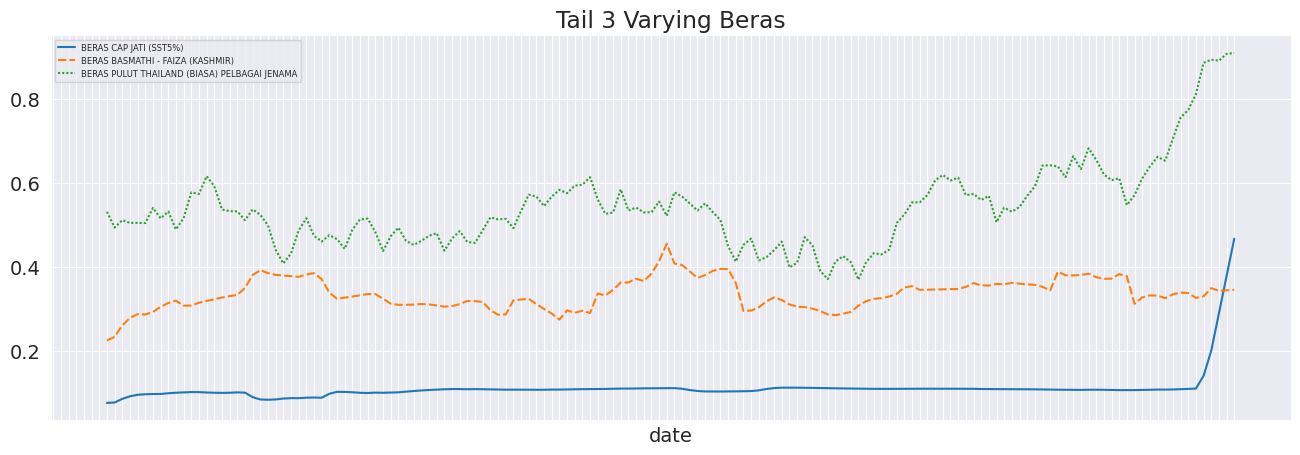

In [ ]:
plt.figure(figsize = (16,5) )
ax = sns.lineplot(data = mavg[tail_index])
ax.legend(fontsize = 6)
ax.xaxis.set_tick_params(labelbottom = False)
ax.set_title("Tail 3 Varying Beras")

Text(0.5, 1.0, 'Top 3 Varying Beras')

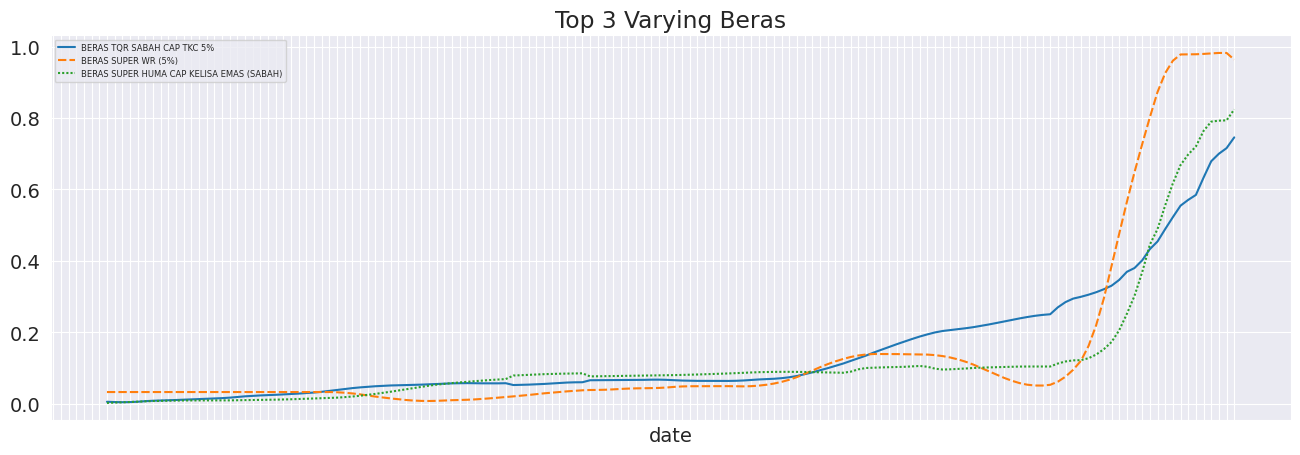

In [ ]:
plt.figure(figsize = (16,5) )
ax = sns.lineplot(data = mavg[top_index])
ax.legend(fontsize = 6)
ax.xaxis.set_tick_params(labelbottom = False)
ax.set_title("Top 3 Varying Beras")

In [ ]:
del date_item_price

#### Q5: Variability in Price Distribution among States

**Solution:** Plot the price distributions across districts in Melaka and Perak to compare the interquartile range.

**Answer:** The distribution in Melaka exhibits similarity with minor transitions, resulting in a longer interquartile range. The dispersed data points across districts contribute to the elongated range. In contrast, Perak's distribution, while distinct, is more concentrated, resulting in a lower dispersion.


In [24]:
date_district_melaka = data[ data["state"] == "Melaka" ][["date", "price", "district"]].groupby( ["date", "district"], as_index = False ).mean().pivot(columns = "district", values = "price", index = "date")
date_district_perak = data[ data["state"] == "Perak" ][["date", "price", "district"]].groupby( ["date", "district"], as_index = False ).mean().pivot(columns = "district", values = "price", index = "date")

Text(0.5, 1.0, 'Melaka Price distribution')

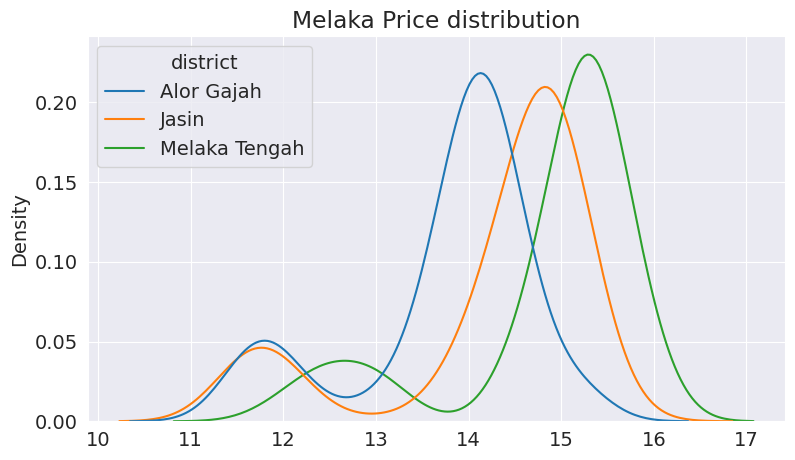

In [ ]:
ax = sns.kdeplot(data = date_district_melaka)
ax.set_title("Melaka Price distribution")

Text(0.5, 1.0, 'Perak Price distribution')

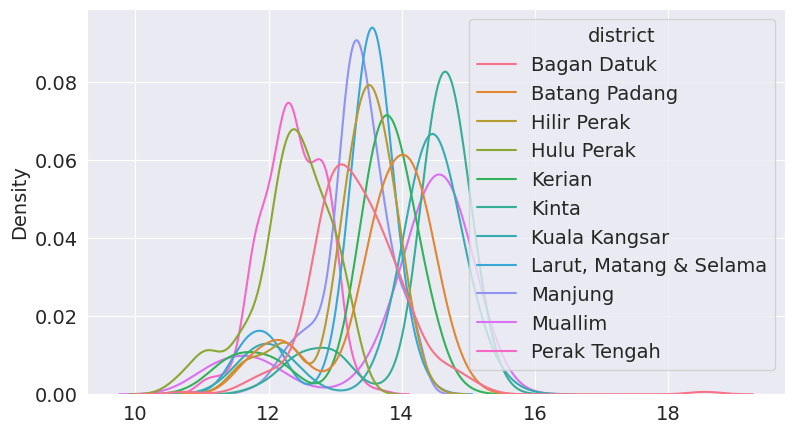

In [ ]:
sns.kdeplot(data = date_district_perak)
ax.set_title("Perak Price distribution")

In [25]:
del date_district_perak, date_district_melaka

#### Q6: Pricing Analysis across Premise Types

**Solution:** Calculate the price confidence of "borong" compared to other premise types using an unpaired t-test.

**Answer:** The analysis shows a high confidence that the prices in "borong" are lower than other premise types, concluding that "borong" offers the lowest prices.


In [4]:
premise_price = {  i : data[data["premise_type"] == i]["price"] for i in data["premise_type"].unique() }

In [10]:
#calculate the borong mean, var and number of records
borong_price = premise_price["Borong"]
mean_borong = borong_price.mean()
var_borong = borong_price.var(ddof = 1)
n_borong = borong_price.count()

In [11]:
#get the premise type in our data other than borong
premise_type = list( data["premise_type"].unique() )
premise_type.remove("Borong")

In [12]:
#calculate the probability of borong really has the lower price than others by unpaired t test
def t_test(c):

  # c_price = data[ data["premise_type"] == c ]["price"]
  c_price = premise_price[c]
  mean_c = c_price.mean()
  var_c = c_price.var(ddof = 1)
  n_c = c_price.count()


  t = (mean_borong - mean_c) / ( (var_c / n_c) + (var_borong / n_borong) )**0.5

  return stats.t.cdf(t, n_c+n_borong ), t

In [13]:
#compare with each premise type
for t in premise_type:
  prob, _ = t_test(t)
  print(f"Borong price is lower than {t} price with alpha of {prob}")


Borong price is lower than Pasar Basah  price with alpha of 3.813888838839152e-132
Borong price is lower than Pasar Raya / Supermarket price with alpha of 0.0
Borong price is lower than Hypermarket price with alpha of 0.0
Borong price is lower than Kedai Runcit price with alpha of 0.0015811605703406446
Borong price is lower than Pasar Mini price with alpha of 1.1119902320933416e-69


#### Q7: Evaluating Price Variation among Premise Types

**Solution:** Conduct an F-test comparing the price variation of "borong" with each other premise type.

**Answer:** The analysis shows that "borong" price variation surpasses all the tests, indicating that "borong" exhibits the most stable variation in pricing.


In [19]:
# get borong variance and number of records
Borong_price = premise_price["Borong"]
var_Borong = Borong_price.var(ddof = 1)
n_Borong = Borong_price.count()

In [20]:
#get all the premise type excpet Borong
columns = list( data["premise_type"].unique() )
columns.remove("Borong")

In [21]:
#F-test
def chi_test(c):

  c_price = premise_price[c]
  var_c = c_price.var(ddof = 1)
  n_c = c_price.count()

  f = var_c / var_Borong

  return stats.f.cdf(f, n_c - 1, n_Borong - 1 )

In [22]:
for t in columns:
  prob = chi_test(t)
  print(f"Borong price is stable than {t} price with alpha of {1 - prob}")

Borong price is stable than Pasar Basah  price with alpha of 1.1102230246251565e-16
Borong price is stable than Pasar Raya / Supermarket price with alpha of 1.1102230246251565e-16
Borong price is stable than Hypermarket price with alpha of 1.1102230246251565e-16
Borong price is stable than Kedai Runcit price with alpha of 1.1102230246251565e-16
Borong price is stable than Pasar Mini price with alpha of 1.1102230246251565e-16


In [26]:
del premise_price

#### Q8: Impact of State on Fruit Prices

**Solution:** Utilize a pair plot to visualize the distribution of fruit prices across different states. Observe the diagonal chart representing the price distribution in specific states and the non-diagonal chart illustrating the scatter plot of prices across state pairs.

**Answer:** An intriguing discovery is the high correlation between all states and their similar slopes, indicating synchronous fruit prices across different regions. Additionally, although each state displays different means and variances, the overall distribution pattern remains largely consistent. This suggests that while state impacts price and its variability, it doesn't significantly alter the overall distribution shape.


In [77]:
price_fruit = data[ data["item_category"] == "BUAH-BUAHAN" ][ ["price", "date", "state"] ].groupby( [ "date", "state"], as_index = False ).mean().pivot(columns = "state", index = "date", values = "price")
price_fruit = ( price_fruit - price_fruit.min() )/ ( price_fruit.max() - price_fruit.min() ) #min max scaling

<Figure size 1500x1500 with 0 Axes>

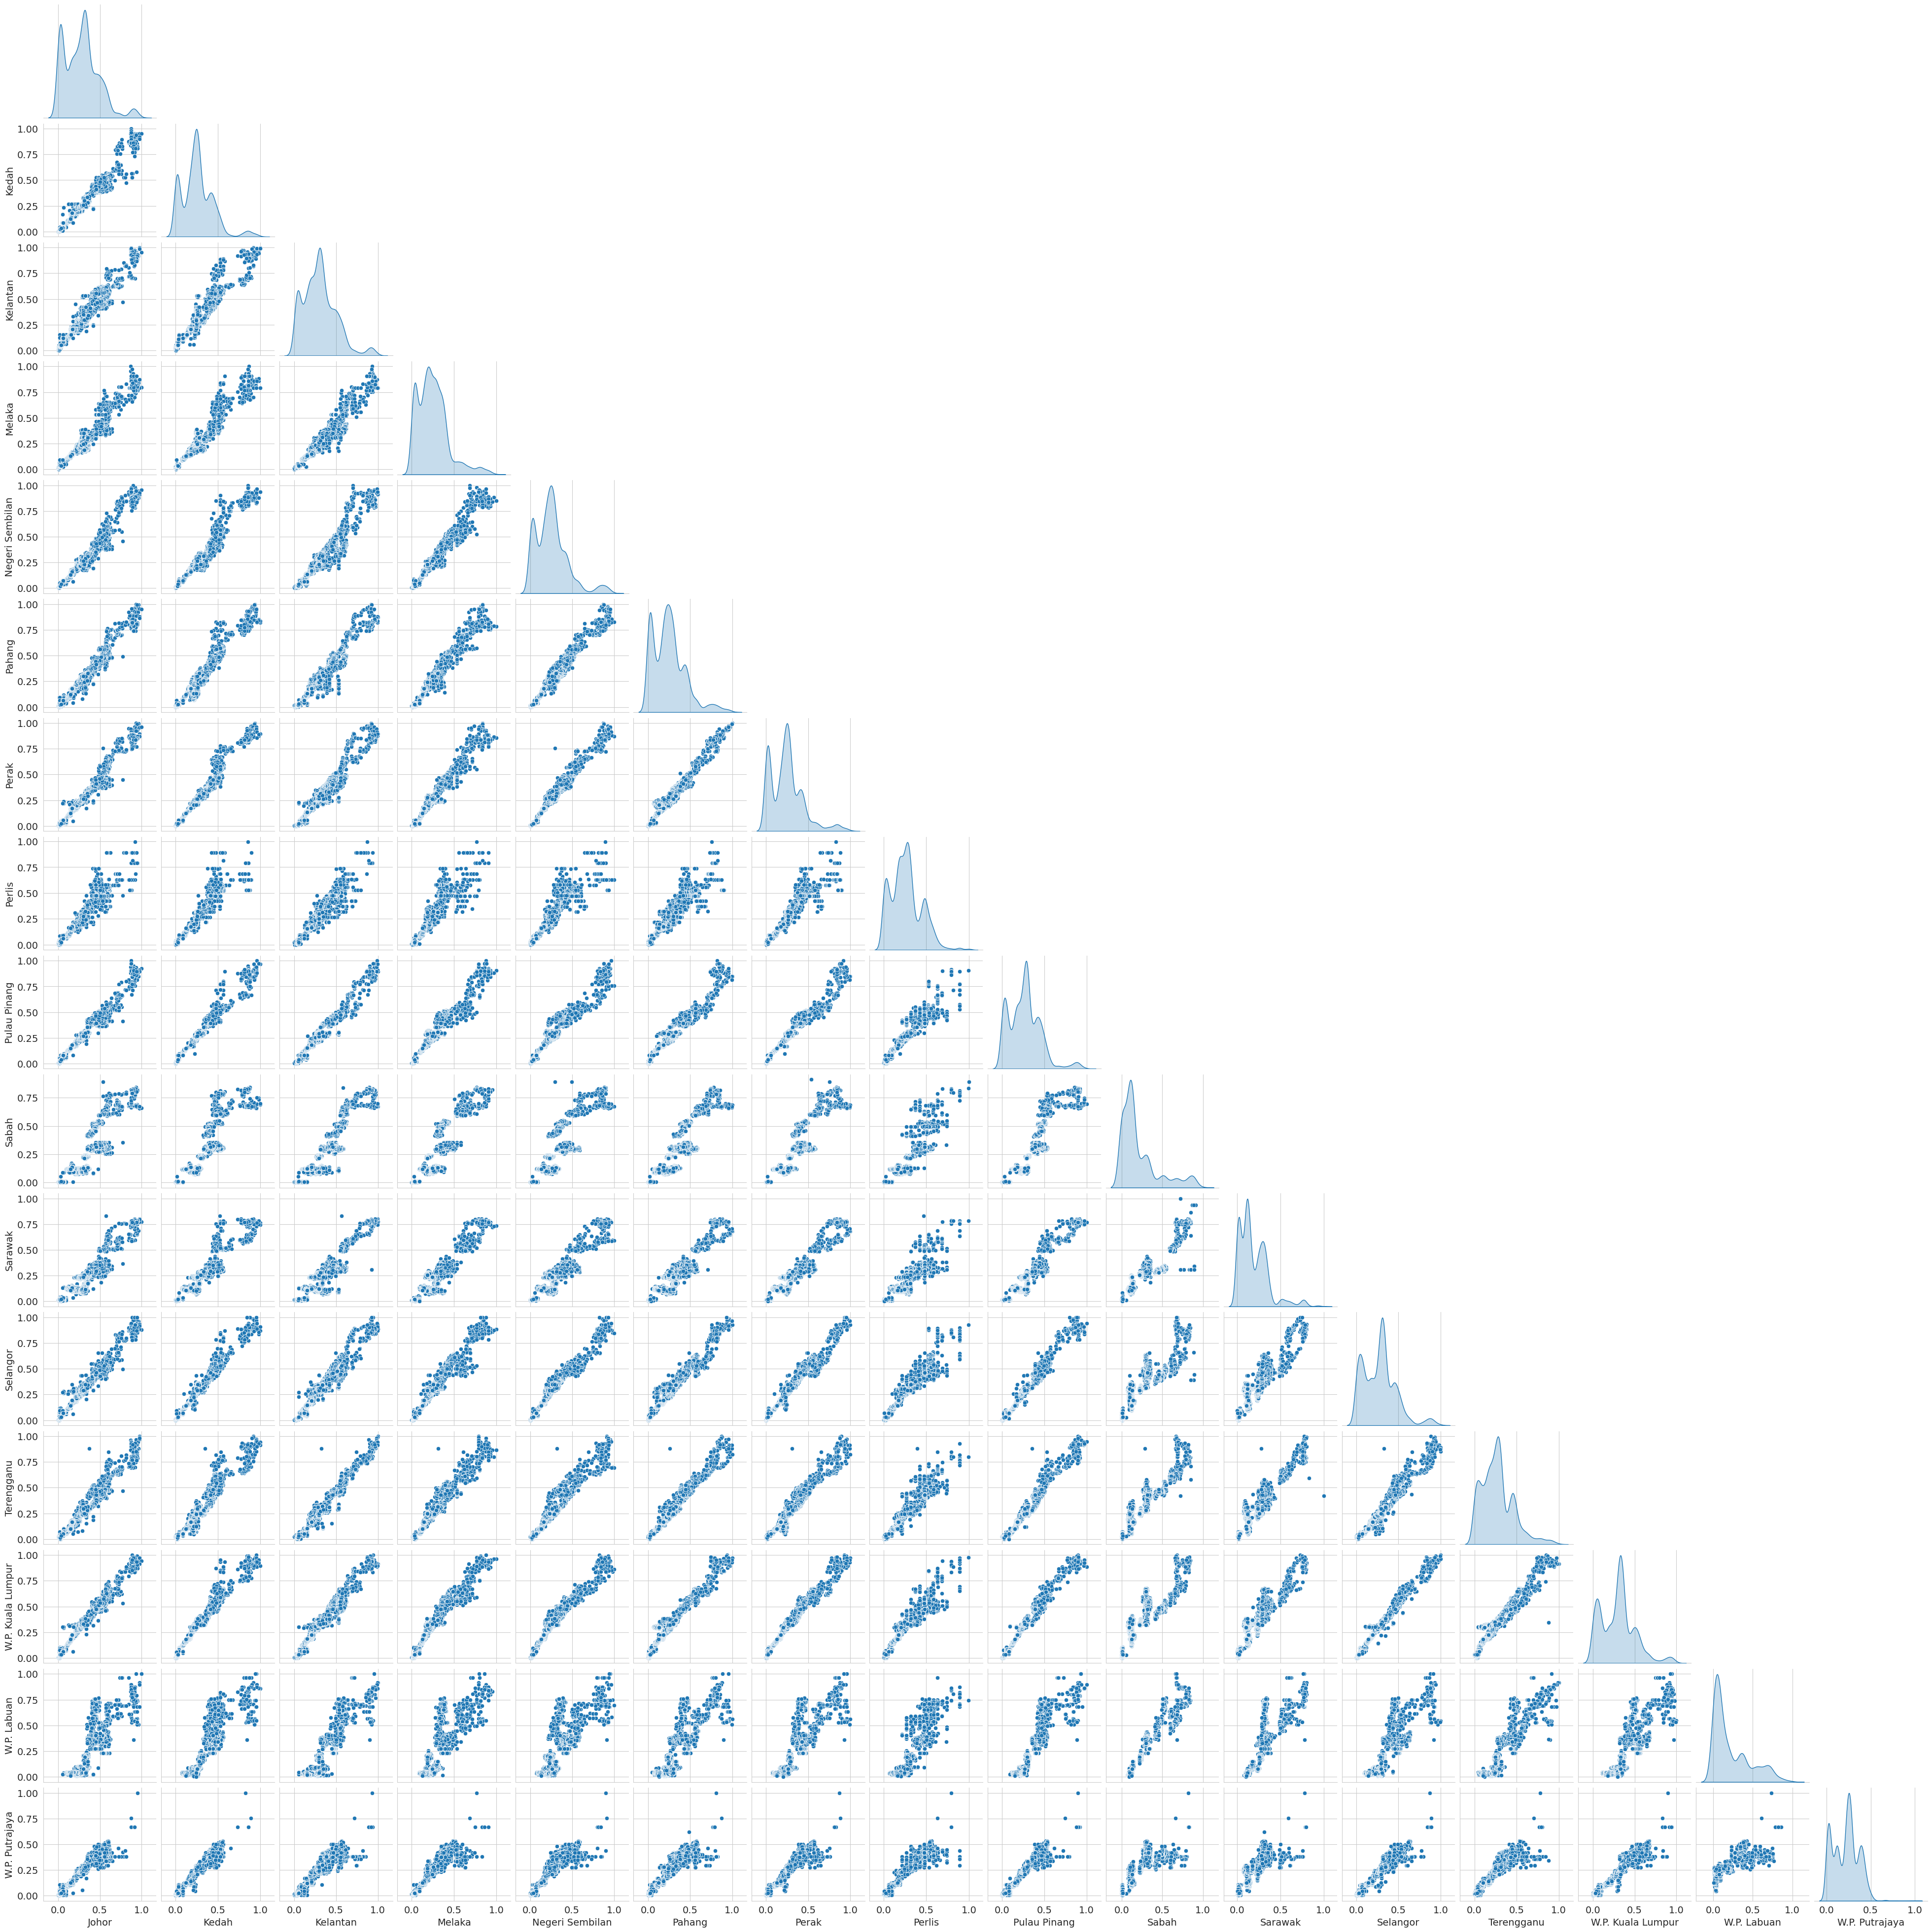

In [83]:
plt.figure(figsize = (15,15))
ax = sns.pairplot( data = price_fruit, corner = True, diag_kind = "kde" )

In [84]:
del price_fruit

### Q9: Item Group Trend Analysis

**Solution:** The data was grouped by price, date, and item_group, visualizing each item_group's price against the date to gauge trends. To enhance clarity, a 60-day moving average was applied.

**Answer:** The analysis revealed that "Produk Kebersihan" exhibited the most prominently inclining trend line, followed by "barangan kering." Intriguingly, the graph highlighted that "barangan berbungkus" displayed significant fluctuations even with the extended smoothing of a long window for moving averages. Contrarily, the long-term perspective suggested a decline in the price of "barangan segar."


In [45]:
itemGrp_price = data[["price", "date", "item_group"]].groupby( ["item_group", "date"], as_index = False ).mean().pivot(columns = "item_group", values = "price", index = "date")
itemGrp_price.interpolate( method = "linear", limit_direction = "forward", inplace = True )
itemGrp_price.fillna( itemGrp_price.median(), inplace = True )
itemGrp_price = ( itemGrp_price - itemGrp_price.min()) / (itemGrp_price.max() - itemGrp_price.min())
itemGrp_price = itemGrp_price.rolling(60).mean()

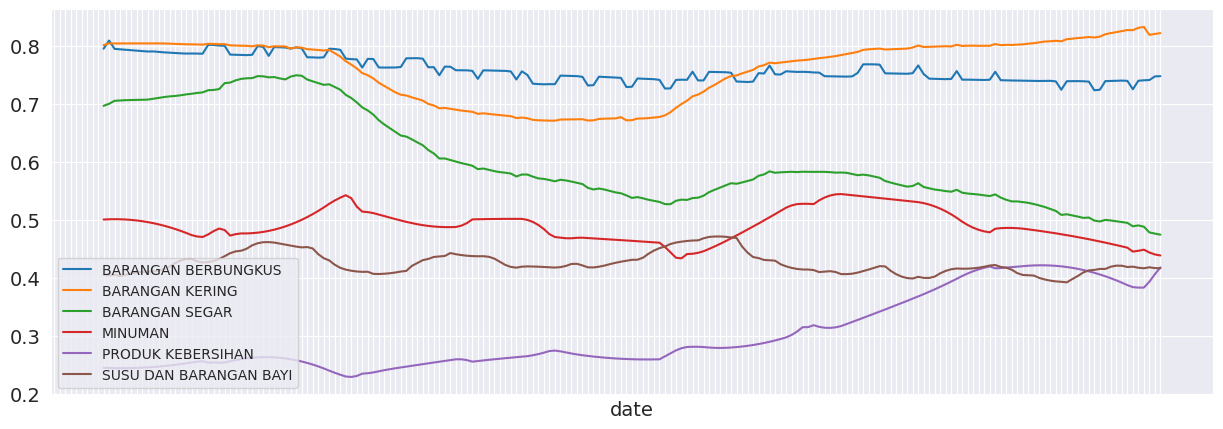

In [46]:
fig, ax = plt.subplots(1,1, figsize = (15,5))
sns.lineplot( data = itemGrp_price, ax = ax, dashes = False )
ax.legend(fontsize = 10)
ax.xaxis.set_tick_params(labelbottom = False)

In [48]:
del itemGrp_price

### Q10: Impact of Different Item Groups on Pricing

**Solution:** Utilizing pair plot graphs with regression lines for distinct item group pairs, the analysis aimed to unveil their interdependent relationships in shaping price trends.

**Answer:** The observed results point towards a primarily independent influence of various item categories on price dynamics. However, notable correlations surfaced in the analysis. Notably, "Minuman" exhibited a correlation with both "susu dan barangan bayi" and "produk kebersihan," showcasing a consistent negative slope in their relationship.


In [49]:
itemGrp_price = data[["price", "date", "item_group"]].groupby( ["item_group", "date"], as_index = False ).mean().pivot(columns = "item_group", values = "price", index = "date")

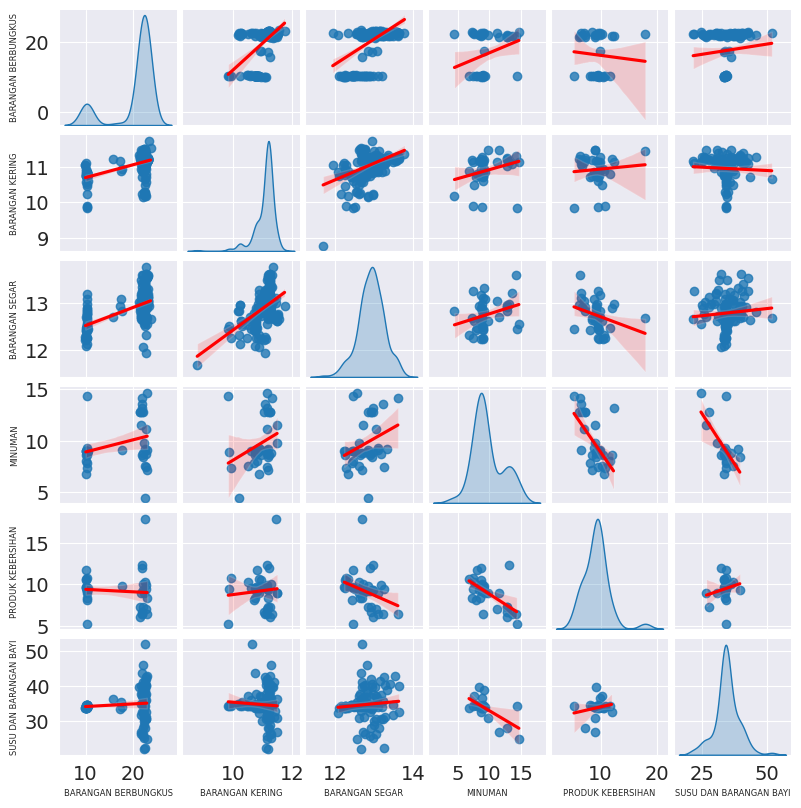

In [54]:
ax = sns.pairplot( data = itemGrp_price, diag_kind = "kde", kind = "reg",  plot_kws = {"line_kws" : {"color": "red"}} )
ax.fig.set_size_inches(8,8)

for x in ax.axes.flatten():
  if x!= None:
    x.set_xlabel( x.get_xlabel(), fontsize = 6)
    x.set_ylabel( x.get_ylabel(), fontsize = 6)

## Inferences and Conclusion

### Detailed Inference Summary

**Observations**


**Q1: Price Increase Over the Year**

Analysis using a heatmap indicated severe fluctuation rather than a consistent price increase for all items.

**Q2: Relationship between Gula and Roti Prices**
While they showed a positive correlation, their interdependence was relatively low.

**Q3: Relationship Between Sayur-sayuran, Buah-buahan, and Ubi Kentang Prices**

Visible trends and negative correlations suggested specific relationships between these categories.

**Q4: Reasons for Fluctuating Beras Prices**

Imported items contributed most to price fluctuation, with certain items being unstable.

**Q5: Variability in Melaka's Price Distribution**

Variations between districts within Melaka contributed significantly to the extended interquartile range.

**Q6: Price Comparison with Borong**
Statistical tests affirmed that Borong had the lowest prices among different premise types.

**Q7: Stability of Prices in Borong**
Borong prices demonstrated the most stable variation when compared to other premise types.

**Q8: Impact of State on Fruit Prices**

All states showed high correlation with similar slopes, indicating synchronous fruit prices between different states.

**Q9: Item Groups with Increasing Trends**

Produk Kebersihan and Barangan Kering exhibited the most incline in price trends, while other categories displayed fluctuations.

**Q10: Impact of Different Item Groups on Prices**
Most item categories seemed independent, with only a few displaying reasonable correlations.


----


### **Conclusion**

The exploration of the dataset began with an in-depth analysis of various columns, notably focusing on the price distribution. The observed pattern, akin to stacked normal distributions, suggested a Gaussian mixture distribution for prices. Moving to the item categories, the substantial volume of data across 38 categories offered a robust basis for conclusions, despite non-uniform distributions. Similarly, the state-wise data, though non-uniformly distributed, provided a substantial level of confidence owing to its substantial volume.

Delving into premise types revealed the existence of six types, with "borong" having notably fewer data entries compared to others. This was followed by a comprehensive study of price distribution by item category. The distributions were predominantly concentrated around the mean, reflecting nearly normal distributions but with smaller variances. Instances of multiple peaks indicated potential further decomposition into components or the requirement for more data.

The analysis of trends in major item categories, such as Carbohydrates, Fiber, and Protein, unearthed compelling observations. For instance, the stable price trend of "roti" and "gula" exhibited similar curves at intervals, suggesting a potential correlation. Additionally, fluctuations were observed in carbohydrate items, abrupt price increases in "beras," smoother variations in fiber items, and complex relationships among item categories.

The examination of price distributions across different states revealed varying extents of variation, with some states exhibiting significantly lower variations compared to others. States like Perak, Perlis, and Pulau Pinang showcased lower variability, while Melaka demonstrated the highest. Further, states like Putrajaya and Sarawak were noted for their higher prices.

Moreover, specific questions were addressed using rigorous analytical methods, including regression analysis, correlation calculations, and comparative statistical tests. These inquiries scrutinized assumptions about uniform price increases, investigated correlations between different item categories, examined reasons for fluctuating rice prices, and assessed price disparities across states.

In summary, the report provided a detailed exploration and analysis of the dataset, uncovering intricate relationships, trends, and dynamics across various categories and parameters. The rigorous analysis offered valuable insights into the dataset's complexities, enabling a better understanding of the interconnections among different factors.

## References and Future Work

### References
- [GeeksforGeeks - Performing F-test in Python](https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/)
- [RowanNicholls - Unpaired Two-Sample T-Test in Python](https://rowannicholls.github.io/python/statistics/hypothesis_testing/unpaired_two_sample_t_test.html)
- [Seaborn - Pairplot Documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- [Seaborn - KDEplot Documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
- [Seaborn - Heatmap Documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Seaborn - Lineplot Documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
- [Seaborn - Histplot Documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html)


### Future Work
I'm deeply interested in delving into forecasting and predictive modeling, especially after unearthing the intricate relationships between the various columns in the dataset and their direct connection to pricing. Creating a robust forecasting model is pivotal, not only to uncover the inner workings of the data but also to extract valuable insights. This has significant potential, particularly for governments seeking to preempt price surges and to offer crucial investment insights to potential investors. I'm exploring several models like the Hidden State Markov Chain, LSTM, transformers, and others to predict future price fluctuations.

The available datasets on Kaggle, such as [Global Food Prices](https://www.kaggle.com/datasets/jboysen/global-food-prices), [Supermarket Sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales), and [Monthly Food Price Estimates](https://www.kaggle.com/datasets/anshtanwar/monthly-food-price-estimates) have been invaluable resources. They provide references for benchmarking, validation, and feature exploration to refine and improve the predictive model.

This initiative aims to bring forth a comprehensive forecasting solution, leveraging the correlations discovered in the dataset, thus aiding governments in managing price increases and supporting investors with valuable insights.
